In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline 

# Parte 1

## Caso 1

In [70]:
caso1_results = pd.read_csv("./results/1era_parte/caso1.csv")
caso1_results

,run,type,module,name,attrname,attrvalue,vectime,vecvalue
0,General-0-20240604-19:37:39-49723,runattr,NaN,NaN,configname,General,NaN,NaN
1,General-0-20240604-19:37:39-49723,runattr,NaN,NaN,datetime,20240604-19:37:39,NaN,NaN
2,General-0-20240604-19:37:39-49723,runattr,NaN,NaN,datetimef,20240604-193739,NaN,NaN
3,General-0-20240604-19:37:39-49723,runattr,NaN,NaN,experiment,General,NaN,NaN
4,General-0-20240604-19:37:39-49723,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN
5,General-0-20240604-19:37:39-49723,runattr,NaN,NaN,iterationvars,NaN,NaN,NaN
6,General-0-20240604-19:37:39-49723,runattr,NaN,NaN,iterationvarsd,NaN,NaN,NaN
7,General-0-20240604-19:37:39-49723,runattr,NaN,NaN,iterationvarsf,NaN,NaN,NaN
8,General-0-20240604-19:37:39-49723,runattr,NaN,NaN,measurement,NaN,NaN,NaN
9,General-0-20240604-19:37:39-49723,runattr,NaN,NaN,network,Network,NaN,NaN


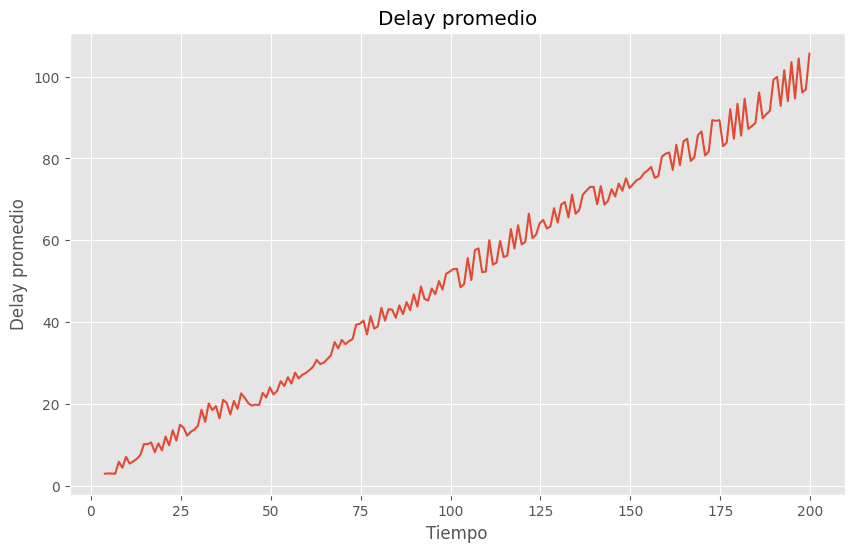

In [72]:
time_delay = caso1_results['vectime'].loc[[37]].tolist()
delay_value = caso1_results['vecvalue'].loc[[37]].tolist() 

time_delay = list(map(float,time_delay[0].split()))
delay_value = list(map(float,delay_value[0].split()))

datos = pd.DataFrame({
    "tiempo": time_delay,
    "delay": delay_value
})

# Agrupa por "tiempo" y calcula el delay promedio
delay_promedio = datos.groupby("tiempo")["delay"].mean()

# Extrae el tiempo y el delay promedio en dos Series separadas
tiempo = delay_promedio.index.to_numpy()
delay_promedio_valores = delay_promedio.values.flatten()

plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si lo deseas
plt.plot(tiempo, delay_promedio_valores)
plt.xlabel("Tiempo")
plt.ylabel("Delay promedio")
plt.title("Delay promedio")

plt.savefig("./results/1era_parte/images/delay_promedio_caso1.png")
# Personaliza el gráfico según tus preferencias (colores, marcadores, etc.)

# Muestra el gráfico
plt.show()


In [73]:
node0_buffer = caso1_results['vecvalue'].loc[[24]].tolist()
node0_time = caso1_results['vectime'].loc[[24]].tolist()

node1_buffer = caso1_results['vecvalue'].loc[[35]].tolist()
node1_time = caso1_results['vectime'].loc[[35]].tolist()

node2_buffer = caso1_results['vecvalue'].loc[[33]].tolist()
node2_time = caso1_results['vectime'].loc[[33]].tolist()

node6_buffer = caso1_results['vecvalue'].loc[[36]].tolist()
node6_time = caso1_results['vectime'].loc[[36]].tolist()

node7_buffer = caso1_results['vecvalue'].loc[[34]].tolist()
node7_time = caso1_results['vectime'].loc[[34]].tolist()

In [74]:
node0_buffer = list(map(float,node0_buffer[0].split()))
node0_time = list(map(float,node0_time[0].split()))

node1_buffer = list(map(float,node1_buffer[0].split()))
node1_time = list(map(float,node1_time[0].split()))

node2_buffer = list(map(float,node2_buffer[0].split()))
node2_time = list(map(float,node2_time[0].split()))

node6_buffer = list(map(float,node6_buffer[0].split()))
node6_time = list(map(float,node6_time[0].split()))

node7_buffer = list(map(float,node7_buffer[0].split()))
node7_time = list(map(float,node7_time[0].split()))

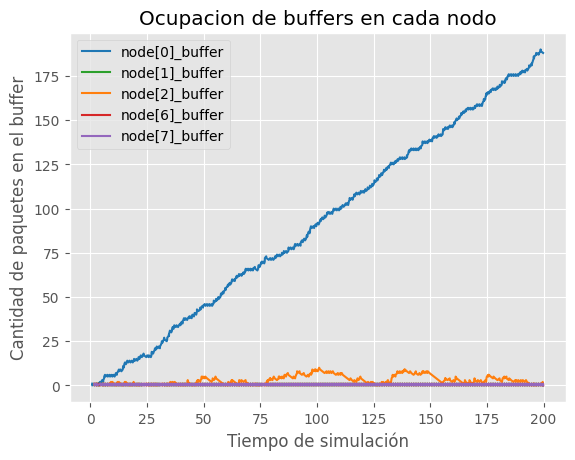

In [75]:
# plt.style.use("ggplot")
plt.plot(node0_time, node0_buffer, color='tab:blue', label="node[0]_buffer")
plt.plot(node1_time, node1_buffer, color='tab:green', label="node[1]_buffer")
plt.plot(node2_time, node2_buffer,color='tab:orange', label="node[2]_buffer")
plt.plot(node6_time, node6_buffer, color='tab:red', label="node[6]_buffer")
plt.plot(node7_time, node7_buffer,color='tab:purple', label="node[7]_buffer")

plt.title('Ocupacion de buffers en cada nodo')
plt.xlabel("Tiempo de simulación")
plt.ylabel("Cantidad de paquetes en el buffer")
plt.legend()
plt.savefig("./results/1era_parte/images/buffer_ocupation_caso1.png")
plt.show()

In [96]:
time_hopCount = caso1_results['vectime'].loc[[38]].tolist()
hopCount_value = caso1_results['vecvalue'].loc[[38]].tolist() 

time_hopCount = list(map(float,time_hopCount[0].split()))
hopCount_value = list(map(float,hopCount_value[0].split()))

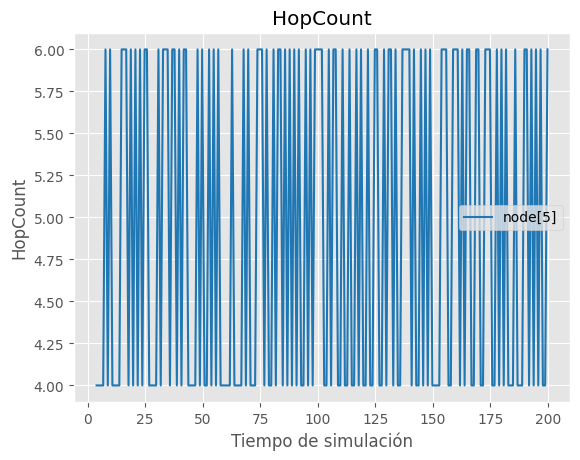

In [98]:
plt.style.use("ggplot")    
plt.plot(time_hopCount,hopCount_value, color='tab:blue', label="node[5]")
plt.title('HopCount')
plt.xlabel("Tiempo de simulación")
plt.ylabel("HopCount")
plt.legend()
plt.savefig("./results/1era_parte/images/hopCount_caso1.png")
plt.show()

## Caso 2 - interArrivalTime= exp(1)

In [76]:
caso2_results = pd.read_csv("./results/1era_parte/caso2.csv")
caso2_results

,run,type,module,name,attrname,attrvalue,vectime,vecvalue
0,General-0-20240604-19:35:21-49512,runattr,NaN,NaN,configname,General,NaN,NaN
1,General-0-20240604-19:35:21-49512,runattr,NaN,NaN,datetime,20240604-19:35:21,NaN,NaN
2,General-0-20240604-19:35:21-49512,runattr,NaN,NaN,datetimef,20240604-193521,NaN,NaN
3,General-0-20240604-19:35:21-49512,runattr,NaN,NaN,experiment,General,NaN,NaN
4,General-0-20240604-19:35:21-49512,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN
5,General-0-20240604-19:35:21-49512,runattr,NaN,NaN,iterationvars,NaN,NaN,NaN
6,General-0-20240604-19:35:21-49512,runattr,NaN,NaN,iterationvarsd,NaN,NaN,NaN
7,General-0-20240604-19:35:21-49512,runattr,NaN,NaN,iterationvarsf,NaN,NaN,NaN
8,General-0-20240604-19:35:21-49512,runattr,NaN,NaN,measurement,NaN,NaN,NaN
9,General-0-20240604-19:35:21-49512,runattr,NaN,NaN,network,Network,NaN,NaN


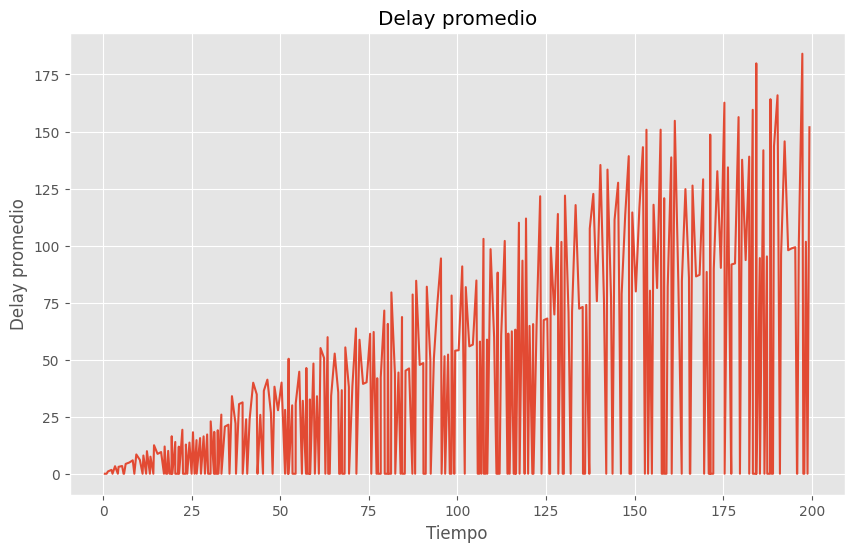

In [77]:
time_delay = caso2_results['vectime'].loc[[23]].tolist()
delay_value = caso2_results['vecvalue'].loc[[23]].tolist() 

time_delay = list(map(float,time_delay[0].split()))
delay_value = list(map(float,delay_value[0].split()))

datos = pd.DataFrame({
    "tiempo": time_delay,
    "delay": delay_value
})

# Agrupa por "tiempo" y calcula el delay promedio
delay_promedio = datos.groupby("tiempo")["delay"].mean()

# Extrae el tiempo y el delay promedio en dos Series separadas
tiempo = delay_promedio.index.to_numpy()
delay_promedio_valores = delay_promedio.values.flatten()

plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si lo deseas
plt.plot(tiempo, delay_promedio_valores)
plt.xlabel("Tiempo")
plt.ylabel("Delay promedio")
plt.title("Delay promedio")

plt.savefig("./results/1era_parte/images/delay_promedio_caso2.png")
# Personaliza el gráfico según tus preferencias (colores, marcadores, etc.)

# Muestra el gráfico
plt.show()


In [78]:
node0_buffer = caso2_results['vecvalue'].loc[[26]].tolist()
node0_time = caso2_results['vectime'].loc[[26]].tolist()

node1_buffer = caso2_results['vecvalue'].loc[[36]].tolist()
node1_time = caso2_results['vectime'].loc[[36]].tolist()

node2_buffer = caso2_results['vecvalue'].loc[[38]].tolist()
node2_time = caso2_results['vectime'].loc[[38]].tolist()

node3_buffer = caso2_results['vecvalue'].loc[[37]].tolist()
node3_time = caso2_results['vectime'].loc[[37]].tolist()

node4_buffer = caso2_results['vecvalue'].loc[[27]].tolist()
node4_time = caso2_results['vectime'].loc[[27]].tolist()

node6_buffer = caso2_results['vecvalue'].loc[[22]].tolist()
node6_time = caso2_results['vectime'].loc[[22]].tolist()

node7_buffer = caso2_results['vecvalue'].loc[[21]].tolist()
node7_time = caso2_results['vectime'].loc[[21]].tolist()

In [79]:
node0_buffer = list(map(float,node0_buffer[0].split()))
node0_time = list(map(float,node0_time[0].split()))

node1_buffer = list(map(float,node1_buffer[0].split()))
node1_time = list(map(float,node1_time[0].split()))

node2_buffer = list(map(float,node2_buffer[0].split()))
node2_time = list(map(float,node2_time[0].split()))

node3_buffer = list(map(float,node3_buffer[0].split()))
node3_time = list(map(float,node3_time[0].split()))

node4_buffer = list(map(float,node4_buffer[0].split()))
node4_time = list(map(float,node4_time[0].split()))

node6_buffer = list(map(float,node6_buffer[0].split()))
node6_time = list(map(float,node6_time[0].split()))

node7_buffer = list(map(float,node7_buffer[0].split()))
node7_time = list(map(float,node7_time[0].split()))

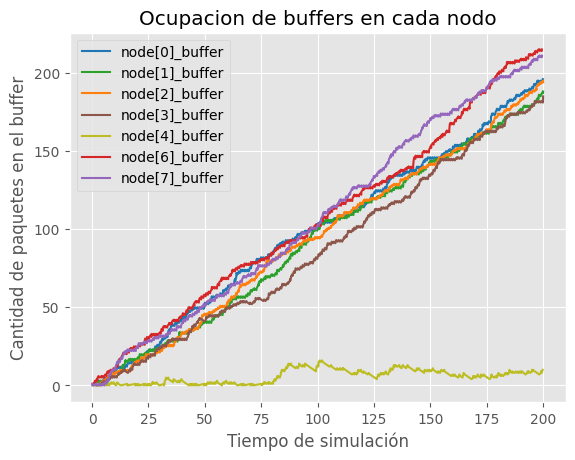

In [80]:
# plt.style.use("ggplot")
plt.plot(node0_time, node0_buffer, color='tab:blue', label="node[0]_buffer")
plt.plot(node1_time, node1_buffer, color='tab:green', label="node[1]_buffer")
plt.plot(node2_time, node2_buffer,color='tab:orange', label="node[2]_buffer")
plt.plot(node3_time, node3_buffer,color='tab:brown', label="node[3]_buffer")
plt.plot(node4_time, node4_buffer,color='tab:olive', label="node[4]_buffer")
plt.plot(node6_time, node6_buffer, color='tab:red', label="node[6]_buffer")
plt.plot(node7_time, node7_buffer,color='tab:purple', label="node[7]_buffer")

plt.title('Ocupacion de buffers en cada nodo')
plt.xlabel("Tiempo de simulación")
plt.ylabel("Cantidad de paquetes en el buffer")
plt.legend()
plt.savefig("./results/1era_parte/images/buffer_ocupation_caso2.png", bbox_inches='tight')

plt.show()

## Caso 2 - interArrivalTime=exp(0.1)

In [81]:
caso2_results = pd.read_csv("./results/1era_parte/caso2_iat_0.1.csv")
caso2_results

,run,type,module,name,attrname,attrvalue,vectime,vecvalue
0,General-0-20240604-19:38:41-49873,runattr,NaN,NaN,configname,General,NaN,NaN
1,General-0-20240604-19:38:41-49873,runattr,NaN,NaN,datetime,20240604-19:38:41,NaN,NaN
2,General-0-20240604-19:38:41-49873,runattr,NaN,NaN,datetimef,20240604-193841,NaN,NaN
3,General-0-20240604-19:38:41-49873,runattr,NaN,NaN,experiment,General,NaN,NaN
4,General-0-20240604-19:38:41-49873,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN
5,General-0-20240604-19:38:41-49873,runattr,NaN,NaN,iterationvars,NaN,NaN,NaN
6,General-0-20240604-19:38:41-49873,runattr,NaN,NaN,iterationvarsd,NaN,NaN,NaN
7,General-0-20240604-19:38:41-49873,runattr,NaN,NaN,iterationvarsf,NaN,NaN,NaN
8,General-0-20240604-19:38:41-49873,runattr,NaN,NaN,measurement,NaN,NaN,NaN
9,General-0-20240604-19:38:41-49873,runattr,NaN,NaN,network,Network,NaN,NaN


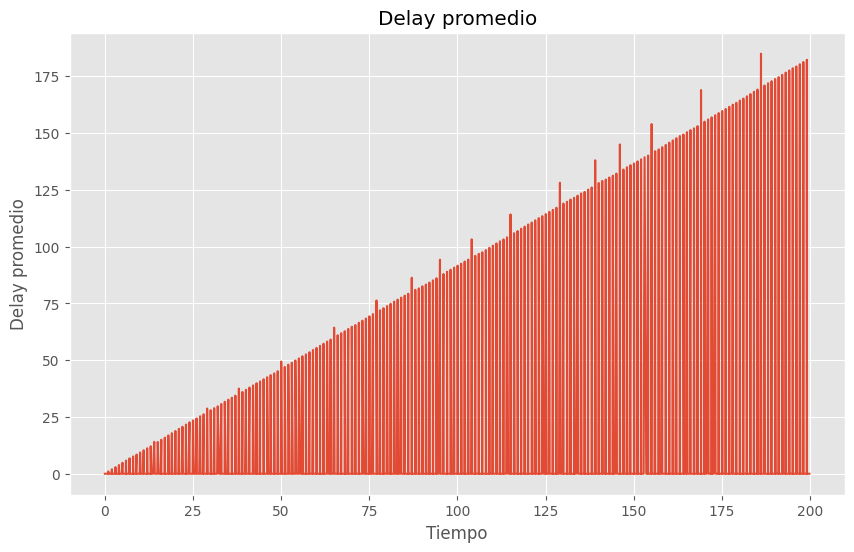

In [82]:
time_delay = caso2_results['vectime'].loc[[23]].tolist()
delay_value = caso2_results['vecvalue'].loc[[23]].tolist() 

time_delay = list(map(float,time_delay[0].split()))
delay_value = list(map(float,delay_value[0].split()))

datos = pd.DataFrame({
    "tiempo": time_delay,
    "delay": delay_value
})

# Agrupa por "tiempo" y calcula el delay promedio
delay_promedio = datos.groupby("tiempo")["delay"].mean()

# Extrae el tiempo y el delay promedio en dos Series separadas
tiempo = delay_promedio.index.to_numpy()
delay_promedio_valores = delay_promedio.values.flatten()

plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si lo deseas
plt.plot(tiempo, delay_promedio_valores)
plt.xlabel("Tiempo")
plt.ylabel("Delay promedio")
plt.title("Delay promedio")

plt.savefig("./results/1era_parte/images/delay_promedio_caso2_iat_0_1.png")
# Personaliza el gráfico según tus preferencias (colores, marcadores, etc.)

# Muestra el gráfico
plt.show()


In [83]:
node0_buffer = caso2_results['vecvalue'].loc[[26]].tolist()
node0_time = caso2_results['vectime'].loc[[26]].tolist()

node1_buffer = caso2_results['vecvalue'].loc[[36]].tolist()
node1_time = caso2_results['vectime'].loc[[36]].tolist()

node2_buffer = caso2_results['vecvalue'].loc[[38]].tolist()
node2_time = caso2_results['vectime'].loc[[38]].tolist()

node3_buffer = caso2_results['vecvalue'].loc[[37]].tolist()
node3_time = caso2_results['vectime'].loc[[37]].tolist()

node4_buffer = caso2_results['vecvalue'].loc[[27]].tolist()
node4_time = caso2_results['vectime'].loc[[27]].tolist()

node6_buffer = caso2_results['vecvalue'].loc[[22]].tolist()
node6_time = caso2_results['vectime'].loc[[22]].tolist()

node7_buffer = caso2_results['vecvalue'].loc[[21]].tolist()
node7_time = caso2_results['vectime'].loc[[21]].tolist()

In [84]:
node0_buffer = list(map(float,node0_buffer[0].split()))
node0_time = list(map(float,node0_time[0].split()))

node1_buffer = list(map(float,node1_buffer[0].split()))
node1_time = list(map(float,node1_time[0].split()))

node2_buffer = list(map(float,node2_buffer[0].split()))
node2_time = list(map(float,node2_time[0].split()))

node3_buffer = list(map(float,node3_buffer[0].split()))
node3_time = list(map(float,node3_time[0].split()))

node4_buffer = list(map(float,node4_buffer[0].split()))
node4_time = list(map(float,node4_time[0].split()))

node6_buffer = list(map(float,node6_buffer[0].split()))
node6_time = list(map(float,node6_time[0].split()))

node7_buffer = list(map(float,node7_buffer[0].split()))
node7_time = list(map(float,node7_time[0].split()))

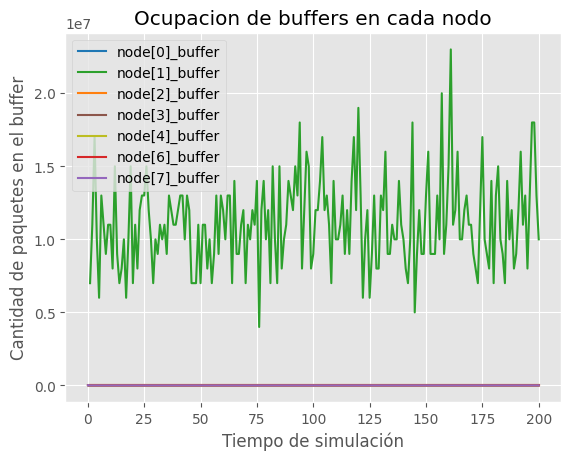

In [85]:
# plt.style.use("ggplot")
plt.plot(node0_time, node0_buffer, color='tab:blue', label="node[0]_buffer")
plt.plot(node1_time, node1_buffer, color='tab:green', label="node[1]_buffer")
plt.plot(node2_time, node2_buffer,color='tab:orange', label="node[2]_buffer")
plt.plot(node3_time, node3_buffer,color='tab:brown', label="node[3]_buffer")
plt.plot(node4_time, node4_buffer,color='tab:olive', label="node[4]_buffer")
plt.plot(node6_time, node6_buffer, color='tab:red', label="node[6]_buffer")
plt.plot(node7_time, node7_buffer,color='tab:purple', label="node[7]_buffer")

plt.title('Ocupacion de buffers en cada nodo')
plt.xlabel("Tiempo de simulación")
plt.ylabel("Cantidad de paquetes en el buffer")
plt.legend()
plt.savefig("./results/1era_parte/images/buffer_ocupation_caso2_iat_0_1.png", bbox_inches='tight')

plt.show()

## Caso 2 - interArrivalTime=exp(0.5)

In [86]:
caso2_results = pd.read_csv("./results/1era_parte/caso2_iat_0.5.csv")
caso2_results

,run,type,module,name,attrname,attrvalue,vectime,vecvalue
0,General-0-20240604-19:40:09-50021,runattr,NaN,NaN,configname,General,NaN,NaN
1,General-0-20240604-19:40:09-50021,runattr,NaN,NaN,datetime,20240604-19:40:09,NaN,NaN
2,General-0-20240604-19:40:09-50021,runattr,NaN,NaN,datetimef,20240604-194009,NaN,NaN
3,General-0-20240604-19:40:09-50021,runattr,NaN,NaN,experiment,General,NaN,NaN
4,General-0-20240604-19:40:09-50021,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN
5,General-0-20240604-19:40:09-50021,runattr,NaN,NaN,iterationvars,NaN,NaN,NaN
6,General-0-20240604-19:40:09-50021,runattr,NaN,NaN,iterationvarsd,NaN,NaN,NaN
7,General-0-20240604-19:40:09-50021,runattr,NaN,NaN,iterationvarsf,NaN,NaN,NaN
8,General-0-20240604-19:40:09-50021,runattr,NaN,NaN,measurement,NaN,NaN,NaN
9,General-0-20240604-19:40:09-50021,runattr,NaN,NaN,network,Network,NaN,NaN


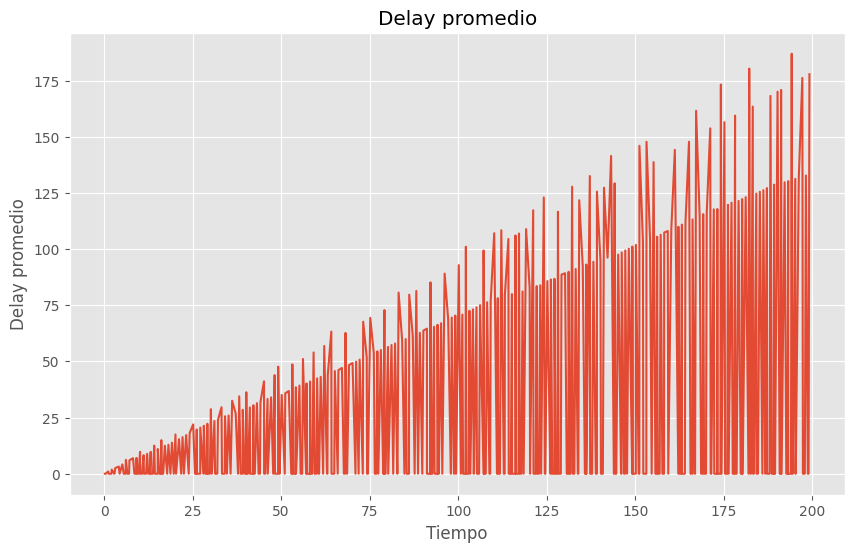

In [87]:
time_delay = caso2_results['vectime'].loc[[23]].tolist()
delay_value = caso2_results['vecvalue'].loc[[23]].tolist() 

time_delay = list(map(float,time_delay[0].split()))
delay_value = list(map(float,delay_value[0].split()))

datos = pd.DataFrame({
    "tiempo": time_delay,
    "delay": delay_value
})

# Agrupa por "tiempo" y calcula el delay promedio
delay_promedio = datos.groupby("tiempo")["delay"].mean()

# Extrae el tiempo y el delay promedio en dos Series separadas
tiempo = delay_promedio.index.to_numpy()
delay_promedio_valores = delay_promedio.values.flatten()

plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si lo deseas
plt.plot(tiempo, delay_promedio_valores)
plt.xlabel("Tiempo")
plt.ylabel("Delay promedio")
plt.title("Delay promedio")

plt.savefig("./results/1era_parte/images/delay_promedio_caso2_iat_0_5.png")
# Personaliza el gráfico según tus preferencias (colores, marcadores, etc.)

# Muestra el gráfico
plt.show()


In [88]:
node0_buffer = caso2_results['vecvalue'].loc[[26]].tolist()
node0_time = caso2_results['vectime'].loc[[26]].tolist()

node1_buffer = caso2_results['vecvalue'].loc[[36]].tolist()
node1_time = caso2_results['vectime'].loc[[36]].tolist()

node2_buffer = caso2_results['vecvalue'].loc[[38]].tolist()
node2_time = caso2_results['vectime'].loc[[38]].tolist()

node3_buffer = caso2_results['vecvalue'].loc[[37]].tolist()
node3_time = caso2_results['vectime'].loc[[37]].tolist()

node4_buffer = caso2_results['vecvalue'].loc[[27]].tolist()
node4_time = caso2_results['vectime'].loc[[27]].tolist()

node6_buffer = caso2_results['vecvalue'].loc[[22]].tolist()
node6_time = caso2_results['vectime'].loc[[22]].tolist()

node7_buffer = caso2_results['vecvalue'].loc[[21]].tolist()
node7_time = caso2_results['vectime'].loc[[21]].tolist()

In [89]:
node0_buffer = list(map(float,node0_buffer[0].split()))
node0_time = list(map(float,node0_time[0].split()))

node1_buffer = list(map(float,node1_buffer[0].split()))
node1_time = list(map(float,node1_time[0].split()))

node2_buffer = list(map(float,node2_buffer[0].split()))
node2_time = list(map(float,node2_time[0].split()))

node3_buffer = list(map(float,node3_buffer[0].split()))
node3_time = list(map(float,node3_time[0].split()))

node4_buffer = list(map(float,node4_buffer[0].split()))
node4_time = list(map(float,node4_time[0].split()))

node6_buffer = list(map(float,node6_buffer[0].split()))
node6_time = list(map(float,node6_time[0].split()))

node7_buffer = list(map(float,node7_buffer[0].split()))
node7_time = list(map(float,node7_time[0].split()))

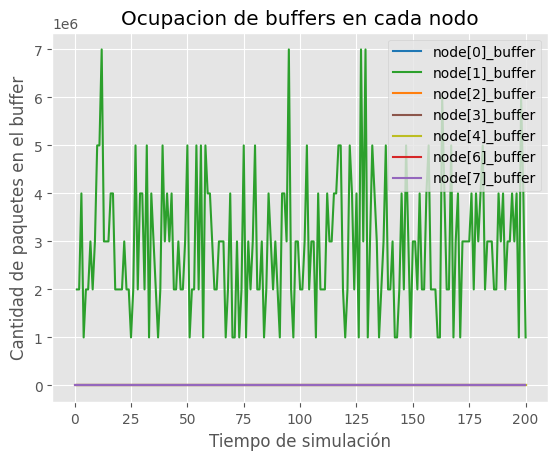

In [90]:
# plt.style.use("ggplot")
plt.plot(node0_time, node0_buffer, color='tab:blue', label="node[0]_buffer")
plt.plot(node1_time, node1_buffer, color='tab:green', label="node[1]_buffer")
plt.plot(node2_time, node2_buffer,color='tab:orange', label="node[2]_buffer")
plt.plot(node3_time, node3_buffer,color='tab:brown', label="node[3]_buffer")
plt.plot(node4_time, node4_buffer,color='tab:olive', label="node[4]_buffer")
plt.plot(node6_time, node6_buffer, color='tab:red', label="node[6]_buffer")
plt.plot(node7_time, node7_buffer,color='tab:purple', label="node[7]_buffer")

plt.title('Ocupacion de buffers en cada nodo')
plt.xlabel("Tiempo de simulación")
plt.ylabel("Cantidad de paquetes en el buffer")
plt.legend()
plt.savefig("./results/1era_parte/images/buffer_ocupation_caso2_iat_0_5.png", bbox_inches='tight')

plt.show()

## Caso 2 - interArrivalTime=exp(0.7)

In [91]:
caso2_results = pd.read_csv("./results/1era_parte/caso2_iat_0.7.csv")
caso2_results

,run,type,module,name,attrname,attrvalue,vectime,vecvalue
0,General-0-20240604-19:40:44-50086,runattr,NaN,NaN,configname,General,NaN,NaN
1,General-0-20240604-19:40:44-50086,runattr,NaN,NaN,datetime,20240604-19:40:44,NaN,NaN
2,General-0-20240604-19:40:44-50086,runattr,NaN,NaN,datetimef,20240604-194044,NaN,NaN
3,General-0-20240604-19:40:44-50086,runattr,NaN,NaN,experiment,General,NaN,NaN
4,General-0-20240604-19:40:44-50086,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN
5,General-0-20240604-19:40:44-50086,runattr,NaN,NaN,iterationvars,NaN,NaN,NaN
6,General-0-20240604-19:40:44-50086,runattr,NaN,NaN,iterationvarsd,NaN,NaN,NaN
7,General-0-20240604-19:40:44-50086,runattr,NaN,NaN,iterationvarsf,NaN,NaN,NaN
8,General-0-20240604-19:40:44-50086,runattr,NaN,NaN,measurement,NaN,NaN,NaN
9,General-0-20240604-19:40:44-50086,runattr,NaN,NaN,network,Network,NaN,NaN


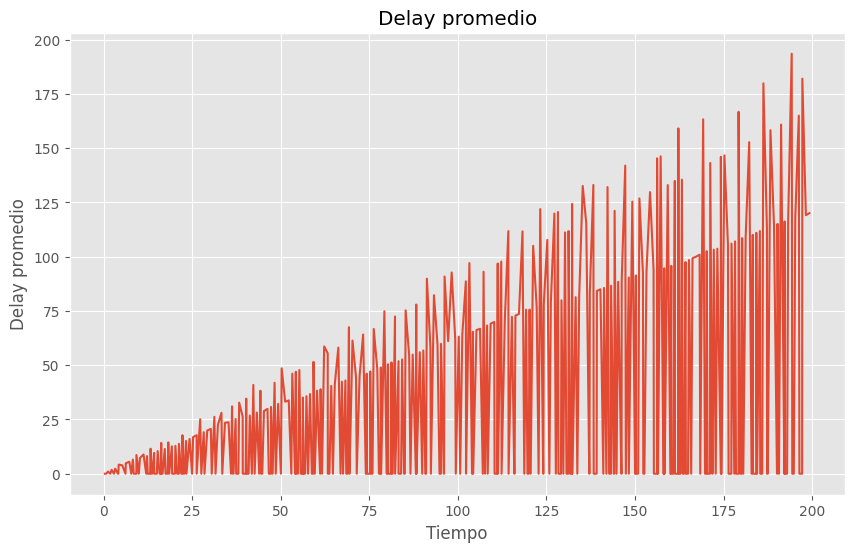

In [92]:
time_delay = caso2_results['vectime'].loc[[23]].tolist()
delay_value = caso2_results['vecvalue'].loc[[23]].tolist() 

time_delay = list(map(float,time_delay[0].split()))
delay_value = list(map(float,delay_value[0].split()))

datos = pd.DataFrame({
    "tiempo": time_delay,
    "delay": delay_value
})

# Agrupa por "tiempo" y calcula el delay promedio
delay_promedio = datos.groupby("tiempo")["delay"].mean()

# Extrae el tiempo y el delay promedio en dos Series separadas
tiempo = delay_promedio.index.to_numpy()
delay_promedio_valores = delay_promedio.values.flatten()

plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si lo deseas
plt.plot(tiempo, delay_promedio_valores)
plt.xlabel("Tiempo")
plt.ylabel("Delay promedio")
plt.title("Delay promedio")

plt.savefig("./results/1era_parte/images/delay_promedio_caso2_iat_0_7.png")
# Personaliza el gráfico según tus preferencias (colores, marcadores, etc.)

# Muestra el gráfico
plt.show()


In [93]:
node0_buffer = caso2_results['vecvalue'].loc[[26]].tolist()
node0_time = caso2_results['vectime'].loc[[26]].tolist()

node1_buffer = caso2_results['vecvalue'].loc[[36]].tolist()
node1_time = caso2_results['vectime'].loc[[36]].tolist()

node2_buffer = caso2_results['vecvalue'].loc[[38]].tolist()
node2_time = caso2_results['vectime'].loc[[38]].tolist()

node3_buffer = caso2_results['vecvalue'].loc[[37]].tolist()
node3_time = caso2_results['vectime'].loc[[37]].tolist()

node4_buffer = caso2_results['vecvalue'].loc[[27]].tolist()
node4_time = caso2_results['vectime'].loc[[27]].tolist()

node6_buffer = caso2_results['vecvalue'].loc[[22]].tolist()
node6_time = caso2_results['vectime'].loc[[22]].tolist()

node7_buffer = caso2_results['vecvalue'].loc[[21]].tolist()
node7_time = caso2_results['vectime'].loc[[21]].tolist()

In [94]:
node0_buffer = list(map(float,node0_buffer[0].split()))
node0_time = list(map(float,node0_time[0].split()))

node1_buffer = list(map(float,node1_buffer[0].split()))
node1_time = list(map(float,node1_time[0].split()))

node2_buffer = list(map(float,node2_buffer[0].split()))
node2_time = list(map(float,node2_time[0].split()))

node3_buffer = list(map(float,node3_buffer[0].split()))
node3_time = list(map(float,node3_time[0].split()))

node4_buffer = list(map(float,node4_buffer[0].split()))
node4_time = list(map(float,node4_time[0].split()))

node6_buffer = list(map(float,node6_buffer[0].split()))
node6_time = list(map(float,node6_time[0].split()))

node7_buffer = list(map(float,node7_buffer[0].split()))
node7_time = list(map(float,node7_time[0].split()))

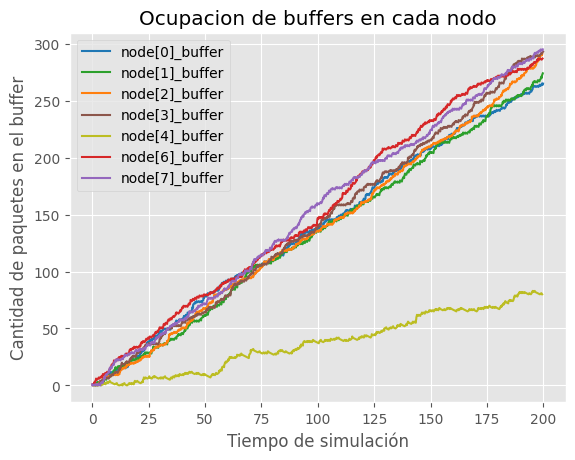

In [95]:
# plt.style.use("ggplot")
plt.plot(node0_time, node0_buffer, color='tab:blue', label="node[0]_buffer")
plt.plot(node1_time, node1_buffer, color='tab:green', label="node[1]_buffer")
plt.plot(node2_time, node2_buffer,color='tab:orange', label="node[2]_buffer")
plt.plot(node3_time, node3_buffer,color='tab:brown', label="node[3]_buffer")
plt.plot(node4_time, node4_buffer,color='tab:olive', label="node[4]_buffer")
plt.plot(node6_time, node6_buffer, color='tab:red', label="node[6]_buffer")
plt.plot(node7_time, node7_buffer,color='tab:purple', label="node[7]_buffer")

plt.title('Ocupacion de buffers en cada nodo')
plt.xlabel("Tiempo de simulación")
plt.ylabel("Cantidad de paquetes en el buffer")
plt.legend()
plt.savefig("./results/1era_parte/images/buffer_ocupation_caso2_iat_0_7.png", bbox_inches='tight')

plt.show()

# Parte 2

## Caso 1

In [2]:
caso1_results = pd.read_csv("./results/2da_parte/caso1_nuevo_nuevo.csv")
caso1_results.tail(28)

,run,type,module,name,attrname,attrvalue,vectime,vecvalue
22,General-0-20240604-22:02:37-59567,vector,Network.node[7].net,Received Packets,NaN,NaN,0.0001 0.0009 0.897574504566 1.693449009132 2....,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
23,General-0-20240604-22:02:37-59567,vector,Network.node[7].lnk[0],Buffer Size,NaN,NaN,0.0001 0.0001 0.0009 0.0009 0.897574504566 0.8...,1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 ...
24,General-0-20240604-22:02:37-59567,vector,Network.node[6].net,Received Packets,NaN,NaN,0.0002 0.001 0.997674504566 1.793549009132 2.5...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
25,General-0-20240604-22:02:37-59567,vector,Network.node[6].lnk[0],Buffer Size,NaN,NaN,0.0002 0.0002 0.001 0.001 0.997674504566 0.997...,1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 ...
26,General-0-20240604-22:02:37-59567,vector,Network.node[5].net,Received Packets,NaN,NaN,0.0003 0.0011 1.097774504566 1.200260388484 1....,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
27,General-0-20240604-22:02:37-59567,vector,Network.node[5].lnk[0],Buffer Size,NaN,NaN,0.0003 0.0003 0.0011 0.0011,1 0 1 0
28,General-0-20240604-22:02:37-59567,vector,Network.node[4].net,Received Packets,NaN,NaN,0.0004 0.0012 1.100160388484 1.998720776968 2....,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
29,General-0-20240604-22:02:37-59567,vector,Network.node[4].lnk[0],Buffer Size,NaN,NaN,0.0004 0.0004 0.0012 0.0012,1 0 1 0
30,General-0-20240604-22:02:37-59567,vector,Network.node[3].net,Received Packets,NaN,NaN,0.0005 0.0013 1.000060388484 1.898620776968 2....,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
31,General-0-20240604-22:02:37-59567,vector,Network.node[3].lnk[0],Buffer Size,NaN,NaN,0.0005 0.0005 0.0013 0.0013,1 0 1 0


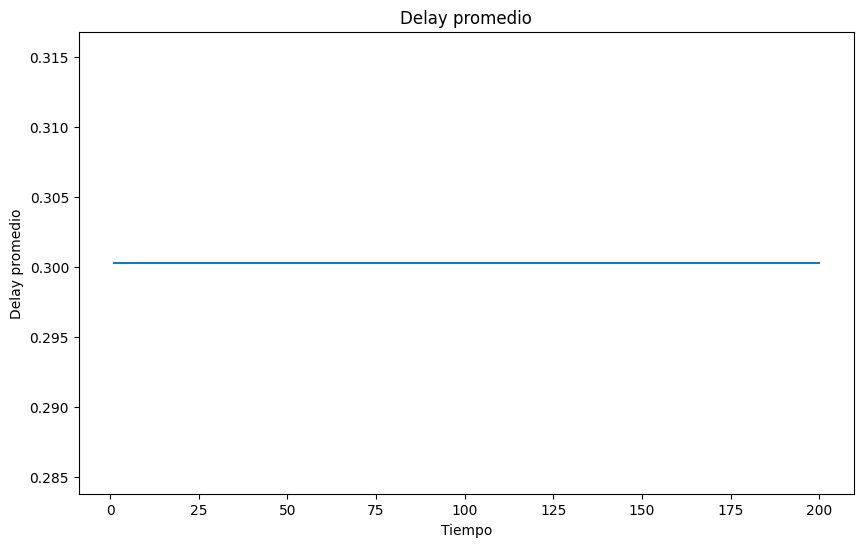

In [3]:
time_delay = caso1_results['vectime'].loc[[47]].tolist()
delay_value = caso1_results['vecvalue'].loc[[47]].tolist() 

time_delay = list(map(float,time_delay[0].split()))
delay_value = list(map(float,delay_value[0].split()))

datos = pd.DataFrame({
    "tiempo": time_delay,
    "delay": delay_value
})

# Agrupa por "tiempo" y calcula el delay promedio
delay_promedio = datos.groupby("tiempo")["delay"].mean()

# Extrae el tiempo y el delay promedio en dos Series separadas
tiempo = delay_promedio.index.to_numpy()
delay_promedio_valores = delay_promedio.values.flatten()

plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si lo deseas
plt.plot(tiempo, delay_promedio_valores)
plt.xlabel("Tiempo")
plt.ylabel("Delay promedio")
plt.title("Delay promedio")

plt.savefig("./results/2da_parte/images/delay_promedio_caso1.png")
# Personaliza el gráfico según tus preferencias (colores, marcadores, etc.)

# Muestra el gráfico
plt.show()


In [4]:
# node0_lnk0_buffer = caso1_results['vecvalue'].loc[[21]].tolist()
# node0_lnk0_time = caso1_results['vectime'].loc[[21]].tolist()

# node0_lnk1_buffer = caso1_results['vecvalue'].loc[[35]].tolist()
# node0_lnk1_time = caso1_results['vectime'].loc[[35]].tolist()

node1_lnk0_buffer = caso1_results['vecvalue'].loc[[35]].tolist()
node1_lnk0_time = caso1_results['vectime'].loc[[35]].tolist()

# node1_lnk1_buffer = caso1_results['vecvalue'].loc[[60]].tolist()
# node1_lnk1_time = caso1_results['vectime'].loc[[60]].tolist()

node2_lnk0_buffer = caso1_results['vecvalue'].loc[[33]].tolist()
node2_lnk0_time = caso1_results['vectime'].loc[[33]].tolist()

node2_lnk1_buffer = caso1_results['vecvalue'].loc[[42]].tolist()
node2_lnk1_time = caso1_results['vectime'].loc[[42]].tolist()

node3_lnk0_buffer = caso1_results['vecvalue'].loc[[31]].tolist()
node3_lnk0_time = caso1_results['vectime'].loc[[31]].tolist()

node3_lnk1_buffer = caso1_results['vecvalue'].loc[[45]].tolist()
node3_lnk1_time = caso1_results['vectime'].loc[[45]].tolist()

node4_lnk0_buffer = caso1_results['vecvalue'].loc[[29]].tolist()
node4_lnk0_time = caso1_results['vectime'].loc[[29]].tolist()

node4_lnk1_buffer = caso1_results['vecvalue'].loc[[49]].tolist()
node4_lnk1_time = caso1_results['vectime'].loc[[49]].tolist()

node5_lnk0_buffer = caso1_results['vecvalue'].loc[[27]].tolist()
node5_lnk0_time = caso1_results['vectime'].loc[[27]].tolist()

# node5_lnk1_buffer = caso1_results['vecvalue'].loc[[68]].tolist()
# node5_lnk1_time = caso1_results['vectime'].loc[[68]].tolist()

node6_lnk0_buffer = caso1_results['vecvalue'].loc[[25]].tolist()
node6_lnk0_time = caso1_results['vectime'].loc[[25]].tolist()

# node6_lnk1_buffer = caso1_results['vecvalue'].loc[[70]].tolist()
# node6_lnk1_time = caso1_results['vectime'].loc[[70]].tolist()

node7_lnk0_buffer = caso1_results['vecvalue'].loc[[23]].tolist()
node7_lnk0_time = caso1_results['vectime'].loc[[23]].tolist()

# node7_lnk1_buffer = caso1_results['vecvalue'].loc[[72]].tolist()
# node7_lnk1_time = caso1_results['vectime'].loc[[72]].tolist()

In [5]:
# node0_lnk0_buffer = list(map(float,node0_lnk0_buffer[0].split()))
# node0_lnk0_time = list(map(float,node0_lnk0_time[0].split()))

# node0_lnk1_buffer = list(map(float,node0_lnk1_buffer[0].split()))
# node0_lnk1_time = list(map(float,node0_lnk1_time[0].split()))

node1_lnk0_buffer = list(map(float,node1_lnk0_buffer[0].split()))
node1_lnk0_time = list(map(float,node1_lnk0_time[0].split()))

# node1_lnk1_buffer = list(map(float,node1_lnk1_buffer[0].split()))
# node1_lnk1_time = list(map(float,node1_lnk1_time[0].split()))

node2_lnk0_buffer = list(map(float,node2_lnk0_buffer[0].split()))
node2_lnk0_time = list(map(float,node2_lnk0_time[0].split()))

# node2_lnk1_buffer = list(map(float,node2_lnk1_buffer[0].split()))
# node2_lnk1_time = list(map(float,node2_lnk1_time[0].split()))

node3_lnk0_buffer = list(map(float,node3_lnk0_buffer[0].split()))
node3_lnk0_time = list(map(float,node3_lnk0_time[0].split()))

# node3_lnk1_buffer = list(map(float,node3_lnk1_buffer[0].split()))
# node3_lnk1_time = list(map(float,node3_lnk1_time[0].split()))

node4_lnk0_buffer = list(map(float,node4_lnk0_buffer[0].split()))
node4_lnk0_time = list(map(float,node4_lnk0_time[0].split()))

# node4_lnk1_buffer = list(map(float,node4_lnk1_buffer[0].split()))
# node4_lnk1_time = list(map(float,node4_lnk1_time[0].split()))

node5_lnk0_buffer = list(map(float,node5_lnk0_buffer[0].split()))
node5_lnk0_time = list(map(float,node5_lnk0_time[0].split()))

# node5_lnk1_buffer = list(map(float,node5_lnk1_buffer[0].split()))
# node5_lnk1_time = list(map(float,node5_lnk1_time[0].split()))

node6_lnk0_buffer = list(map(float,node6_lnk0_buffer[0].split()))
node6_lnk0_time = list(map(float,node6_lnk0_time[0].split()))

# node6_lnk1_buffer = list(map(float,node6_lnk1_buffer[0].split()))
# node6_lnk1_time = list(map(float,node6_lnk1_time[0].split()))

node7_lnk0_buffer = list(map(float,node7_lnk0_buffer[0].split()))
node7_lnk0_time = list(map(float,node7_lnk0_time[0].split()))

# node7_lnk1_buffer = list(map(float,node7_lnk1_buffer[0].split()))
# node7_lnk1_time = list(map(float,node7_lnk1_time[0].split()))

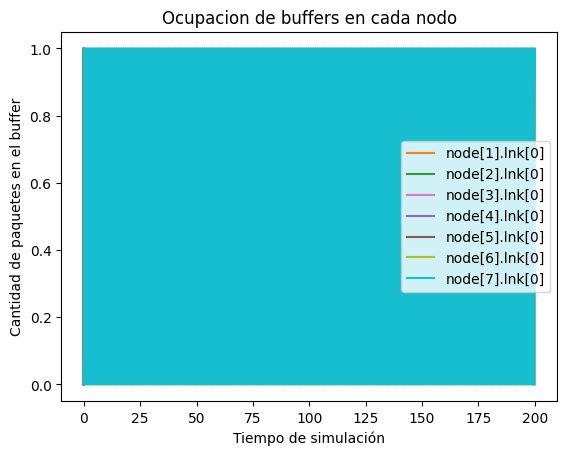

In [6]:
# plt.style.use("ggplot")
# plt.plot(node0_lnk0_time, node0_lnk0_buffer, color='tab:blue', label="node[0].lnk[0]")
# plt.plot(node0_lnk1_time, node0_lnk1_buffer, color='tab:gray', label="node[0].lnk[1]")
plt.plot(node1_lnk0_time, node1_lnk0_buffer, color='tab:orange', label="node[1].lnk[0]")
# plt.plot(node1_lnk1_time, node1_lnk1_buffer, color='tab:orange', label="node[1].lnk[1]")
plt.plot(node2_lnk0_time, node2_lnk0_buffer, color='tab:green', label="node[2].lnk[0]")
# plt.plot(node2_lnk1_time, node2_lnk1_buffer, color='tab:green', label="node[2].lnk[1]")
plt.plot(node3_lnk0_time, node3_lnk0_buffer, color='tab:pink', label="node[3].lnk[0]")
# plt.plot(node3_lnk1_time, node3_lnk1_buffer, color='tab:pink', label="node[3].lnk[1]")
plt.plot(node4_lnk0_time, node4_lnk0_buffer, color='tab:purple', label="node[4].lnk[0]")
# plt.plot(node4_lnk1_time, node4_lnk1_buffer, color='tab:purple', label="node[4].lnk[1]")
plt.plot(node5_lnk0_time, node5_lnk0_buffer, color='tab:brown', label="node[5].lnk[0]")
# plt.plot(node5_lnk1_time, node5_lnk1_buffer, color='tab:brown', label="node[5].lnk[1]")
plt.plot(node6_lnk0_time, node6_lnk0_buffer, color='tab:olive', label="node[6].lnk[0]")
# plt.plot(node6_lnk1_time, node6_lnk1_buffer, color='tab:olive', label="node[6].lnk[1]")
plt.plot(node7_lnk0_time, node7_lnk0_buffer, color='tab:cyan', label="node[7].lnk[0]")
# plt.plot(node7_lnk1_time, node7_lnk1_buffer, color='tab:cyan', label="node[7].lnk[1]")

plt.title('Ocupacion de buffers en cada nodo')
plt.xlabel("Tiempo de simulación")
plt.ylabel("Cantidad de paquetes en el buffer")
plt.legend()
plt.savefig("./results/2da_parte/images/buffer_ocupation_caso1.png")
plt.show()

In [9]:
time_hopCount = caso1_results['vectime'].loc[[46]].tolist()
hopCount_value = caso1_results['vecvalue'].loc[[46]].tolist() 

time_hopCount = list(map(float,time_hopCount[0].split()))
hopCount_value = list(map(float,hopCount_value[0].split()))

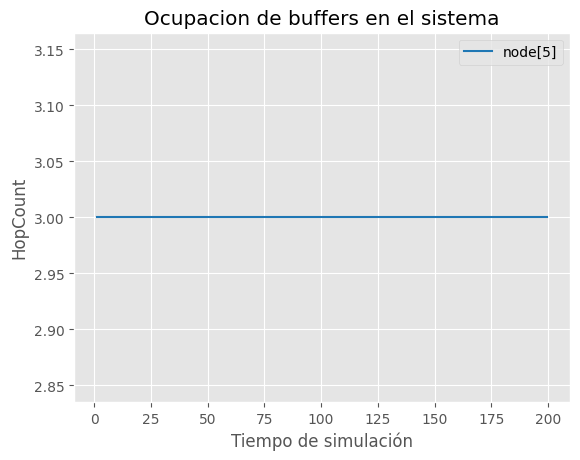

In [10]:
plt.style.use("ggplot")    
plt.plot(time_hopCount,hopCount_value, color='tab:blue', label="node[5]")
plt.title('Ocupacion de buffers en el sistema')
plt.xlabel("Tiempo de simulación")
plt.ylabel("HopCount")
plt.legend()
plt.savefig("./results/2da_parte/images/hopCount_caso1.png")
plt.show()

# Caso 2

In [11]:
caso2_results = pd.read_csv("./results/2da_parte/caso2_nuevo_nuevo.csv")
caso2_results.tail(45)

,run,type,module,name,attrname,attrvalue,vectime,vecvalue
12,General-0-20240604-22:12:38-60205,runattr,NaN,NaN,replication,#0,NaN,NaN
13,General-0-20240604-22:12:38-60205,runattr,NaN,NaN,resultdir,results,NaN,NaN
14,General-0-20240604-22:12:38-60205,runattr,NaN,NaN,runnumber,0,NaN,NaN
15,General-0-20240604-22:12:38-60205,runattr,NaN,NaN,seedset,0,NaN,NaN
16,General-0-20240604-22:12:38-60205,config,NaN,NaN,network,Network,NaN,NaN
17,General-0-20240604-22:12:38-60205,config,NaN,NaN,sim-time-limit,200s,NaN,NaN
18,General-0-20240604-22:12:38-60205,config,NaN,NaN,"Network.node[{0,1,2,3,4,6,7,8}].app.interArriv...",exponential(1),NaN,NaN
19,General-0-20240604-22:12:38-60205,config,NaN,NaN,"Network.node[{0,1,2,3,4,6,7,8}].app.packetByte...",12500,NaN,NaN
20,General-0-20240604-22:12:38-60205,config,NaN,NaN,"Network.node[{0,1,2,3,4,6,7,8}].app.destination",5,NaN,NaN
21,General-0-20240604-22:12:38-60205,vector,Network.node[0].lnk[0],Buffer Size,NaN,NaN,0 0 0.0008 0.0008 0.797474504566 0.79747450456...,1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 ...


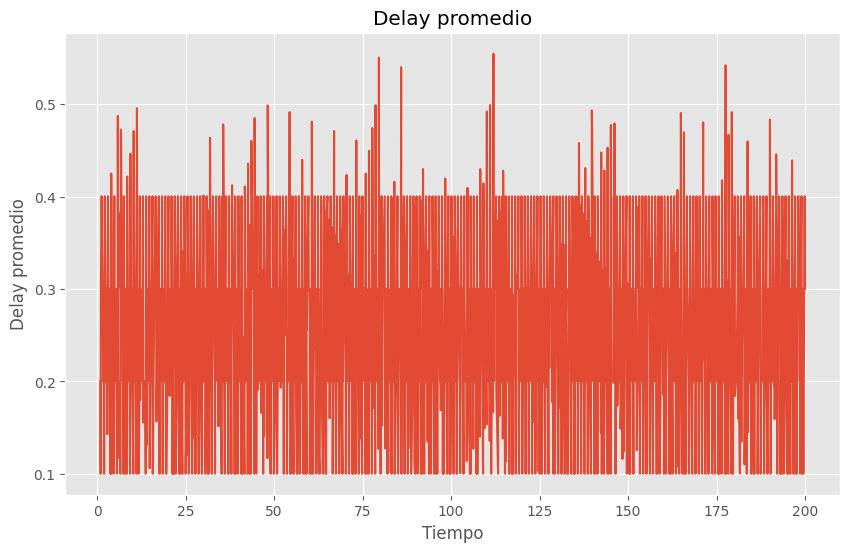

In [12]:
time_delay = caso2_results['vectime'].loc[[49]].tolist()
delay_value = caso2_results['vecvalue'].loc[[49]].tolist() 

time_delay = list(map(float,time_delay[0].split()))
delay_value = list(map(float,delay_value[0].split()))

datos = pd.DataFrame({
    "tiempo": time_delay,
    "delay": delay_value
})

# Agrupa por "tiempo" y calcula el delay promedio
delay_promedio = datos.groupby("tiempo")["delay"].mean()

# Extrae el tiempo y el delay promedio en dos Series separadas
tiempo = delay_promedio.index.to_numpy()
delay_promedio_valores = delay_promedio.values.flatten()

plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si lo deseas
plt.plot(tiempo, delay_promedio_valores)
plt.xlabel("Tiempo")
plt.ylabel("Delay promedio")
plt.title("Delay promedio")

plt.savefig("./results/2da_parte/images/delay_promedio_caso2.png")
# Personaliza el gráfico según tus preferencias (colores, marcadores, etc.)

# Muestra el gráfico
plt.show()


In [13]:
node0_lnk0_buffer = caso2_results['vecvalue'].loc[[21]].tolist()
node0_lnk0_time = caso2_results['vectime'].loc[[21]].tolist()

# node0_lnk1_buffer = caso2_results['vecvalue'].loc[[58]].tolist()
# node0_lnk1_time = caso2_results['vectime'].loc[[58]].tolist()

node1_lnk0_buffer = caso2_results['vecvalue'].loc[[35]].tolist()
node1_lnk0_time = caso2_results['vectime'].loc[[35]].tolist()

node1_lnk1_buffer = caso2_results['vecvalue'].loc[[44]].tolist()
node1_lnk1_time = caso2_results['vectime'].loc[[44]].tolist()

node2_lnk0_buffer = caso2_results['vecvalue'].loc[[33]].tolist()
node2_lnk0_time = caso2_results['vectime'].loc[[33]].tolist()

node2_lnk1_buffer = caso2_results['vecvalue'].loc[[51]].tolist()
node2_lnk1_time = caso2_results['vectime'].loc[[51]].tolist()

node3_lnk0_buffer = caso2_results['vecvalue'].loc[[31]].tolist()
node3_lnk0_time = caso2_results['vectime'].loc[[31]].tolist()

node3_lnk1_buffer = caso2_results['vecvalue'].loc[[53]].tolist()
node3_lnk1_time = caso2_results['vectime'].loc[[53]].tolist()

node4_lnk0_buffer = caso2_results['vecvalue'].loc[[29]].tolist()
node4_lnk0_time = caso2_results['vectime'].loc[[29]].tolist()

node4_lnk1_buffer = caso2_results['vecvalue'].loc[[47]].tolist()
node4_lnk1_time = caso2_results['vectime'].loc[[47]].tolist()

node5_lnk0_buffer = caso2_results['vecvalue'].loc[[27]].tolist()
node5_lnk0_time = caso2_results['vectime'].loc[[27]].tolist()

# node5_lnk1_buffer = caso2_results['vecvalue'].loc[[68]].tolist()
# node5_lnk1_time = caso2_results['vectime'].loc[[68]].tolist()

node6_lnk0_buffer = caso2_results['vecvalue'].loc[[25]].tolist()
node6_lnk0_time = caso2_results['vectime'].loc[[25]].tolist()

# node6_lnk1_buffer = caso1_results['vecvalue'].loc[[70]].tolist()
# node6_lnk1_time = caso1_results['vectime'].loc[[70]].tolist()

node7_lnk0_buffer = caso2_results['vecvalue'].loc[[23]].tolist()
node7_lnk0_time = caso2_results['vectime'].loc[[23]].tolist()

# node7_lnk1_buffer = caso1_results['vecvalue'].loc[[72]].tolist()
# node7_lnk1_time = caso1_results['vectime'].loc[[72]].tolist()

In [14]:
node0_lnk0_buffer = list(map(float,node0_lnk0_buffer[0].split()))
node0_lnk0_time = list(map(float,node0_lnk0_time[0].split()))

# node0_lnk1_buffer = list(map(float,node0_lnk1_buffer[0].split()))
# node0_lnk1_time = list(map(float,node0_lnk1_time[0].split()))

node1_lnk0_buffer = list(map(float,node1_lnk0_buffer[0].split()))
node1_lnk0_time = list(map(float,node1_lnk0_time[0].split()))

node1_lnk1_buffer = list(map(float,node1_lnk1_buffer[0].split()))
node1_lnk1_time = list(map(float,node1_lnk1_time[0].split()))

node2_lnk0_buffer = list(map(float,node2_lnk0_buffer[0].split()))
node2_lnk0_time = list(map(float,node2_lnk0_time[0].split()))

node2_lnk1_buffer = list(map(float,node2_lnk1_buffer[0].split()))
node2_lnk1_time = list(map(float,node2_lnk1_time[0].split()))

node3_lnk0_buffer = list(map(float,node3_lnk0_buffer[0].split()))
node3_lnk0_time = list(map(float,node3_lnk0_time[0].split()))

node3_lnk1_buffer = list(map(float,node3_lnk1_buffer[0].split()))
node3_lnk1_time = list(map(float,node3_lnk1_time[0].split()))

node4_lnk0_buffer = list(map(float,node4_lnk0_buffer[0].split()))
node4_lnk0_time = list(map(float,node4_lnk0_time[0].split()))

node4_lnk1_buffer = list(map(float,node4_lnk1_buffer[0].split()))
node4_lnk1_time = list(map(float,node4_lnk1_time[0].split()))

# node5_lnk0_buffer = list(map(float,node5_lnk0_buffer[0].split()))
# node5_lnk0_time = list(map(float,node5_lnk0_time[0].split()))

# node5_lnk1_buffer = list(map(float,node5_lnk1_buffer[0].split()))
# node5_lnk1_time = list(map(float,node5_lnk1_time[0].split()))

node6_lnk0_buffer = list(map(float,node6_lnk0_buffer[0].split()))
node6_lnk0_time = list(map(float,node6_lnk0_time[0].split()))

# node6_lnk1_buffer = list(map(float,node6_lnk1_buffer[0].split()))
# node6_lnk1_time = list(map(float,node6_lnk1_time[0].split()))

node7_lnk0_buffer = list(map(float,node7_lnk0_buffer[0].split()))
node7_lnk0_time = list(map(float,node7_lnk0_time[0].split()))

# node7_lnk1_buffer = list(map(float,node7_lnk1_buffer[0].split()))
# node7_lnk1_time = list(map(float,node7_lnk1_time[0].split()))

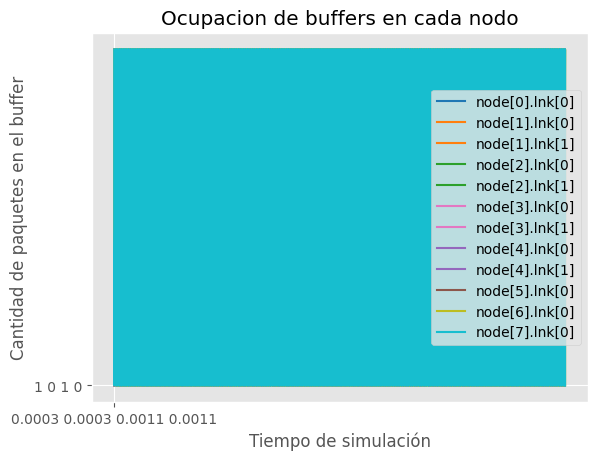

In [17]:
# plt.style.use("ggplot")
plt.plot(node0_lnk0_time, node0_lnk0_buffer, color='tab:blue', label="node[0].lnk[0]")
# plt.plot(node0_lnk1_time, node0_lnk1_buffer, color='tab:gray', label="node[0].lnk[1]")
plt.plot(node1_lnk0_time, node1_lnk0_buffer, color='tab:orange', label="node[1].lnk[0]")
plt.plot(node1_lnk1_time, node1_lnk1_buffer, color='tab:orange', label="node[1].lnk[1]")
plt.plot(node2_lnk0_time, node2_lnk0_buffer, color='tab:green', label="node[2].lnk[0]")
plt.plot(node2_lnk1_time, node2_lnk1_buffer, color='tab:green', label="node[2].lnk[1]")
plt.plot(node3_lnk0_time, node3_lnk0_buffer, color='tab:pink', label="node[3].lnk[0]")
plt.plot(node3_lnk1_time, node3_lnk1_buffer, color='tab:pink', label="node[3].lnk[1]")
plt.plot(node4_lnk0_time, node4_lnk0_buffer, color='tab:purple', label="node[4].lnk[0]")
plt.plot(node4_lnk1_time, node4_lnk1_buffer, color='tab:purple', label="node[4].lnk[1]")
plt.plot(node5_lnk0_time, node5_lnk0_buffer, color='tab:brown', label="node[5].lnk[0]")
# plt.plot(node5_lnk1_time, node5_lnk1_buffer, color='tab:brown', label="node[5].lnk[1]")
plt.plot(node6_lnk0_time, node6_lnk0_buffer, color='tab:olive', label="node[6].lnk[0]")
# plt.plot(node6_lnk1_time, node6_lnk1_buffer, color='tab:olive', label="node[6].lnk[1]")
plt.plot(node7_lnk0_time, node7_lnk0_buffer, color='tab:cyan', label="node[7].lnk[0]")
# plt.plot(node7_lnk1_time, node7_lnk1_buffer, color='tab:cyan', label="node[7].lnk[1]")

plt.title('Ocupacion de buffers en cada nodo')
plt.xlabel("Tiempo de simulación")
plt.ylabel("Cantidad de paquetes en el buffer")
plt.legend()
plt.savefig("./results/2da_parte/images/buffer_ocupation_caso2.png")
plt.show()

In [18]:
time_hopCount = caso2_results['vectime'].loc[[48]].tolist()
hopCount_value = caso2_results['vecvalue'].loc[[48]].tolist() 

time_hopCount = list(map(float,time_hopCount[0].split()))
hopCount_value = list(map(float,hopCount_value[0].split()))

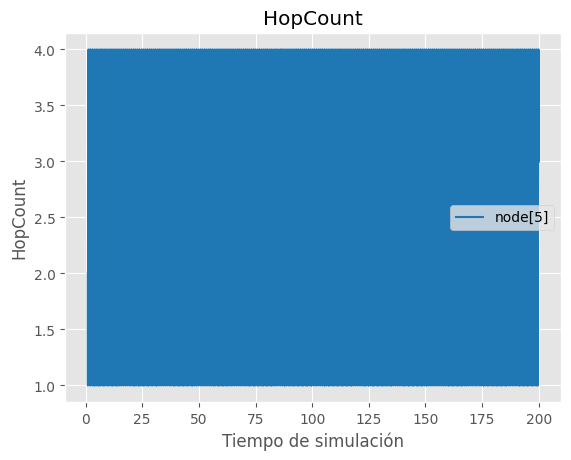

In [19]:
plt.style.use("ggplot")    
plt.plot(time_hopCount,hopCount_value, color='tab:blue', label="node[5]")
plt.title('HopCount')
plt.xlabel("Tiempo de simulación")
plt.ylabel("HopCount")
plt.legend()
plt.savefig("./results/2da_parte/images/hopCount_caso2.png")
plt.show()

In [11]:
caso1_results = pd.read_csv("./caso1_alt.csv")
caso1_results.tail(50)

,run,type,module,name,attrname,attrvalue,vectime,vecvalue
0,General-0-20240604-10:56:28-11921,runattr,NaN,NaN,configname,General,NaN,NaN
1,General-0-20240604-10:56:28-11921,runattr,NaN,NaN,datetime,20240604-10:56:28,NaN,NaN
2,General-0-20240604-10:56:28-11921,runattr,NaN,NaN,datetimef,20240604-105628,NaN,NaN
3,General-0-20240604-10:56:28-11921,runattr,NaN,NaN,experiment,General,NaN,NaN
4,General-0-20240604-10:56:28-11921,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN
5,General-0-20240604-10:56:28-11921,runattr,NaN,NaN,iterationvars,NaN,NaN,NaN
6,General-0-20240604-10:56:28-11921,runattr,NaN,NaN,iterationvarsd,NaN,NaN,NaN
7,General-0-20240604-10:56:28-11921,runattr,NaN,NaN,iterationvarsf,NaN,NaN,NaN
8,General-0-20240604-10:56:28-11921,runattr,NaN,NaN,measurement,NaN,NaN,NaN
9,General-0-20240604-10:56:28-11921,runattr,NaN,NaN,network,Network,NaN,NaN


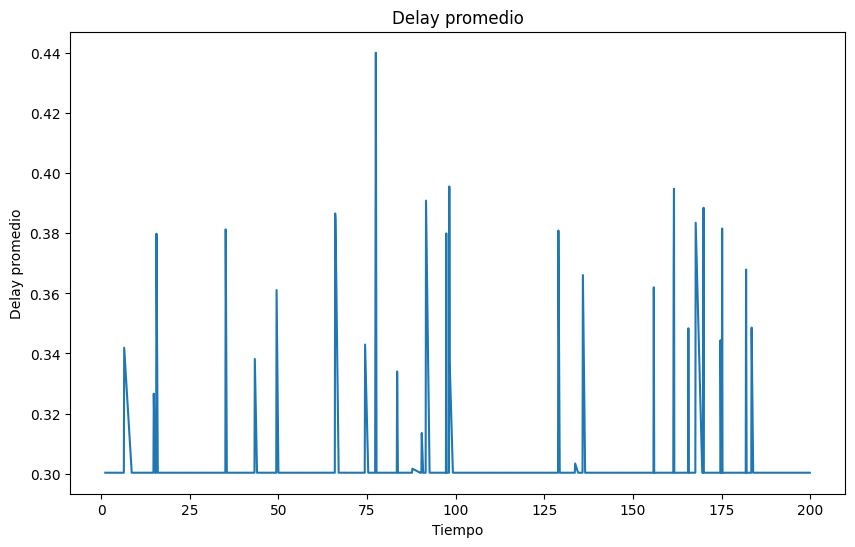

In [12]:
time_delay = caso1_results['vectime'].loc[[32]].tolist()
delay_value = caso1_results['vecvalue'].loc[[32]].tolist() 

time_delay = list(map(float,time_delay[0].split()))
delay_value = list(map(float,delay_value[0].split()))

datos = pd.DataFrame({
    "tiempo": time_delay,
    "delay": delay_value
})

# Agrupa por "tiempo" y calcula el delay promedio
delay_promedio = datos.groupby("tiempo")["delay"].mean()

# Extrae el tiempo y el delay promedio en dos Series separadas
tiempo = delay_promedio.index.to_numpy()
delay_promedio_valores = delay_promedio.values.flatten()

plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si lo deseas
plt.plot(tiempo, delay_promedio_valores)
plt.xlabel("Tiempo")
plt.ylabel("Delay promedio")
plt.title("Delay promedio")

# plt.savefig("./results/2da_parte/images/delay_promedio_caso1_alt")
# Personaliza el gráfico según tus preferencias (colores, marcadores, etc.)

# Muestra el gráfico
plt.show()


In [8]:
node0_lnk0_buffer = caso1_results['vecvalue'].loc[[23]].tolist()
node0_lnk0_time = caso1_results['vectime'].loc[[23]].tolist()

# node0_lnk1_buffer = caso1_results['vecvalue'].loc[[58]].tolist()
# node0_lnk1_time = caso1_results['vectime'].loc[[58]].tolist()

node1_lnk0_buffer = caso1_results['vecvalue'].loc[[59]].tolist()
node1_lnk0_time = caso1_results['vectime'].loc[[59]].tolist()

node1_lnk1_buffer = caso1_results['vecvalue'].loc[[60]].tolist()
node1_lnk1_time = caso1_results['vectime'].loc[[60]].tolist()

node2_lnk0_buffer = caso1_results['vecvalue'].loc[[61]].tolist()
node2_lnk0_time = caso1_results['vectime'].loc[[61]].tolist()

node2_lnk1_buffer = caso1_results['vecvalue'].loc[[62]].tolist()
node2_lnk1_time = caso1_results['vectime'].loc[[62]].tolist()

node3_lnk0_buffer = caso1_results['vecvalue'].loc[[63]].tolist()
node3_lnk0_time = caso1_results['vectime'].loc[[63]].tolist()

node3_lnk1_buffer = caso1_results['vecvalue'].loc[[64]].tolist()
node3_lnk1_time = caso1_results['vectime'].loc[[64]].tolist()

node4_lnk0_buffer = caso1_results['vecvalue'].loc[[65]].tolist()
node4_lnk0_time = caso1_results['vectime'].loc[[65]].tolist()

node4_lnk1_buffer = caso1_results['vecvalue'].loc[[66]].tolist()
node4_lnk1_time = caso1_results['vectime'].loc[[66]].tolist()

node5_lnk0_buffer = caso1_results['vecvalue'].loc[[67]].tolist()
node5_lnk0_time = caso1_results['vectime'].loc[[67]].tolist()

# node5_lnk1_buffer = caso1_results['vecvalue'].loc[[68]].tolist()
# node5_lnk1_time = caso1_results['vectime'].loc[[68]].tolist()

node6_lnk0_buffer = caso1_results['vecvalue'].loc[[69]].tolist()
node6_lnk0_time = caso1_results['vectime'].loc[[69]].tolist()

# node6_lnk1_buffer = caso1_results['vecvalue'].loc[[70]].tolist()
# node6_lnk1_time = caso1_results['vectime'].loc[[70]].tolist()

node7_lnk0_buffer = caso1_results['vecvalue'].loc[[71]].tolist()
node7_lnk0_time = caso1_results['vectime'].loc[[71]].tolist()

# node7_lnk1_buffer = caso1_results['vecvalue'].loc[[72]].tolist()
# node7_lnk1_time = caso1_results['vectime'].loc[[72]].tolist()

In [9]:
node0_lnk0_buffer = list(map(float,node0_lnk0_buffer[0].split()))
node0_lnk0_time = list(map(float,node0_lnk0_time[0].split()))

# node0_lnk1_buffer = list(map(float,node0_lnk1_buffer[0].split()))
# node0_lnk1_time = list(map(float,node0_lnk1_time[0].split()))

node1_lnk0_buffer = list(map(float,node1_lnk0_buffer[0].split()))
node1_lnk0_time = list(map(float,node1_lnk0_time[0].split()))

node1_lnk1_buffer = list(map(float,node1_lnk1_buffer[0].split()))
node1_lnk1_time = list(map(float,node1_lnk1_time[0].split()))

node2_lnk0_buffer = list(map(float,node2_lnk0_buffer[0].split()))
node2_lnk0_time = list(map(float,node2_lnk0_time[0].split()))

node2_lnk1_buffer = list(map(float,node2_lnk1_buffer[0].split()))
node2_lnk1_time = list(map(float,node2_lnk1_time[0].split()))

node3_lnk0_buffer = list(map(float,node3_lnk0_buffer[0].split()))
node3_lnk0_time = list(map(float,node3_lnk0_time[0].split()))

node3_lnk1_buffer = list(map(float,node3_lnk1_buffer[0].split()))
node3_lnk1_time = list(map(float,node3_lnk1_time[0].split()))

node4_lnk0_buffer = list(map(float,node4_lnk0_buffer[0].split()))
node4_lnk0_time = list(map(float,node4_lnk0_time[0].split()))

node4_lnk1_buffer = list(map(float,node4_lnk1_buffer[0].split()))
node4_lnk1_time = list(map(float,node4_lnk1_time[0].split()))

node5_lnk0_buffer = list(map(float,node5_lnk0_buffer[0].split()))
node5_lnk0_time = list(map(float,node5_lnk0_time[0].split()))

# node5_lnk1_buffer = list(map(float,node5_lnk1_buffer[0].split()))
# node5_lnk1_time = list(map(float,node5_lnk1_time[0].split()))

node6_lnk0_buffer = list(map(float,node6_lnk0_buffer[0].split()))
node6_lnk0_time = list(map(float,node6_lnk0_time[0].split()))

# node6_lnk1_buffer = list(map(float,node6_lnk1_buffer[0].split()))
# node6_lnk1_time = list(map(float,node6_lnk1_time[0].split()))

node7_lnk0_buffer = list(map(float,node7_lnk0_buffer[0].split()))
node7_lnk0_time = list(map(float,node7_lnk0_time[0].split()))

# node7_lnk1_buffer = list(map(float,node7_lnk1_buffer[0].split()))
# node7_lnk1_time = list(map(float,node7_lnk1_time[0].split()))

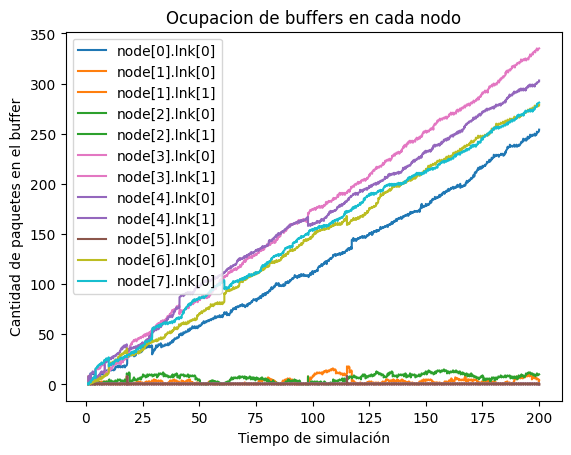

In [10]:
# plt.style.use("ggplot")
plt.plot(node0_lnk0_time, node0_lnk0_buffer, color='tab:blue', label="node[0].lnk[0]")
# plt.plot(node0_lnk1_time, node0_lnk1_buffer, color='tab:gray', label="node[0].lnk[1]")
plt.plot(node1_lnk0_time, node1_lnk0_buffer, color='tab:orange', label="node[1].lnk[0]")
plt.plot(node1_lnk1_time, node1_lnk1_buffer, color='tab:orange', label="node[1].lnk[1]")
plt.plot(node2_lnk0_time, node2_lnk0_buffer, color='tab:green', label="node[2].lnk[0]")
plt.plot(node2_lnk1_time, node2_lnk1_buffer, color='tab:green', label="node[2].lnk[1]")
plt.plot(node3_lnk0_time, node3_lnk0_buffer, color='tab:pink', label="node[3].lnk[0]")
plt.plot(node3_lnk1_time, node3_lnk1_buffer, color='tab:pink', label="node[3].lnk[1]")
plt.plot(node4_lnk0_time, node4_lnk0_buffer, color='tab:purple', label="node[4].lnk[0]")
plt.plot(node4_lnk1_time, node4_lnk1_buffer, color='tab:purple', label="node[4].lnk[1]")
plt.plot(node5_lnk0_time, node5_lnk0_buffer, color='tab:brown', label="node[5].lnk[0]")
# plt.plot(node5_lnk1_time, node5_lnk1_buffer, color='tab:brown', label="node[5].lnk[1]")
plt.plot(node6_lnk0_time, node6_lnk0_buffer, color='tab:olive', label="node[6].lnk[0]")
# plt.plot(node6_lnk1_time, node6_lnk1_buffer, color='tab:olive', label="node[6].lnk[1]")
plt.plot(node7_lnk0_time, node7_lnk0_buffer, color='tab:cyan', label="node[7].lnk[0]")
# plt.plot(node7_lnk1_time, node7_lnk1_buffer, color='tab:cyan', label="node[7].lnk[1]")

plt.title('Ocupacion de buffers en cada nodo')
plt.xlabel("Tiempo de simulación")
plt.ylabel("Cantidad de paquetes en el buffer")
plt.legend()
# plt.savefig("./results/2da_parte/images/buffer_ocupation_caso1_alt")
plt.show()